# I Regression algorithm implementation 
This homework problem will illustrate the use of loss functions and gradient descent to implement linear regression. 
1. Implement a linear regression algorithm using your implementation of gradient descent for the following objective/loss functions:
<br>
a. Mean absolute error $\ell_{1}:E_{1}(f) = \sum_{k = 1}^{n}\lvert f(x_{k}) - y_{k}\lvert$,
<br>
b. Least squared error $\ell_{2}:E_{2}(f) = \left(\sum_{k = 1}^{n}\lvert f(x_{k}) - y_{k}\lvert\right)^{\frac{1}{2}}$,
<br>
where $f(x) = mx - b$. For the gradient descent implementation, you may not use an optimizer like scipy.optimize or cvx.
2. Test your algorithm on the dataset almost_linear.csv (fit one set of data either TV vs sales or Radio vs sales) using at most three different learning rates. Plot $\ell_{1}$ and $\ell_{2}$ errors as a function of number of iterations of your algorithm. State values for $m$, $b$ and total error for each objective/loss function and learning rate combination.
3. Compare your results with a standard linear regression solver like sklearn.linear_model.LinearRegression.

In [1]:
### Question 1 ###
# Performing Gradient Descent (mean absolute error)
def gradDescent_1(X, Y, m, b, L = 0.001, epochs = 1000):
    # Initialize error array
    err = np.zeros(epochs)
    for i in range(epochs):
        # Define model: f(x) = mx - b
        Y_pred = m*X - b
        # Partial derivative of the loss function w.r.t m
        dfdm = sum(X*(Y_pred - Y)/abs(Y_pred - Y))
        # Partial derivative of the loss function w.r.t b
        dfdb = sum((-Y_pred + Y)/abs(Y_pred - Y))
        # Update m
        m = m - L * dfdm
        # Update b
        b = b - L * dfdb
        # Calculate mean absolute error
        err[i] = sum(abs(Y_pred - Y))
    # Return calculated coefficients and error
    return m, b, err
# Performing Gradient Descent (least squared error)
def gradDescent_2(X, Y, m, b, L = 0.001, epochs = 1000):
    # Initialize error array
    err = np.zeros(epochs)
    for i in range(epochs):
        # Define model: f(x) = mx - b
        Y_pred = m*X - b
        # Partial derivative of the loss function w.r.t m
        dfdm = (1/2)*sum(abs(Y_pred - Y))**(-1/2) * sum(X*(Y_pred - Y)/abs(Y_pred - Y))
        # Partial derivative of the loss function w.r.t b
        dfdb = (1/2)*sum(abs(Y_pred - Y))**(-1/2) * sum((-Y_pred + Y)/abs(Y_pred - Y))
        # Update m
        m = m - L * dfdm
        # Update b
        b = b - L * dfdb
        # Calculate least squared error
        err[i] = sum(abs(Y_pred - Y))**(1/2)
    # Return calculated coefficients and error
    return m, b, err

========================================Mean Absolute Error=========================================
m = 12.376799999999998, b = 30.775999999999694, L = 0.002, Error = 6460.319940000003
m = 11.861200000000244, b = 21.32200000000005, L = 0.001, Error = 6550.194130000005
m = 10.943459999999472, b = 7.8534000000000015, L = 0.0001, Error = 6759.075895000009

========================================Least Squared Error=========================================
m = 10.786632519494407, b = 6.182362375552867, L = 0.002, Error = 82.40814167897994
m = 10.777743453843412, b = 6.065708423175781, L = 0.001, Error = 82.42181176895721
m = 10.239835144833437, b = 5.995792825860543, L = 0.0001, Error = 83.2996971186752


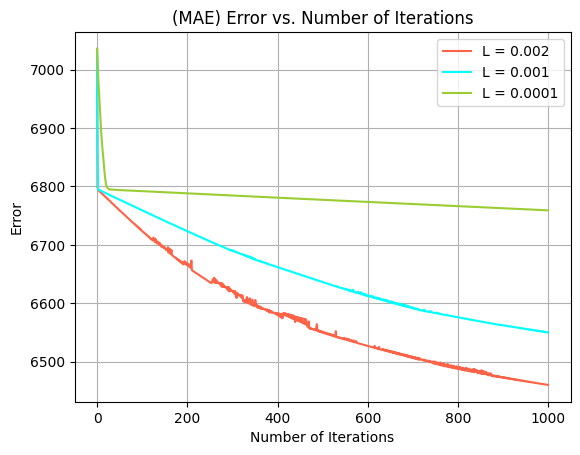

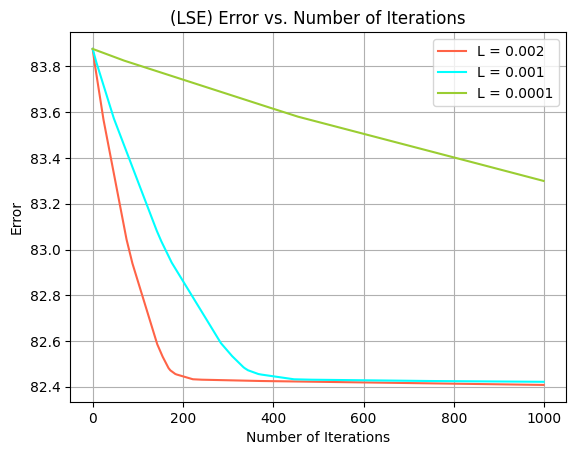

In [2]:
### Question 2 ###
# Import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
# Load in data
df = pd.read_csv('almost_linear.csv')
# Isolate data
sales_X = df.loc[:,'sales'].values.reshape(-1, 1)
TV_Y = df.loc[:,'TV'].values.reshape(-1, 1)
# Split the data into training/testing sets
sales_X_train, sales_X_test, TV_Y_train, TV_Y_test = train_test_split(sales_X, TV_Y, test_size = 0.2)
# Initial guesses for coefficients
m0, b0 = 10, 6
# Learning step sizes
L = [0.002, 0.001, 0.0001]
# Plot data (mean absolute error)
plt.figure()
colors = ['tomato', 'cyan', 'yellowgreen'] 
print('=' * 40 + 'Mean Absolute Error' + '=' * 41)
for i in range(len(L)):
    # Train Gradient Descent
    m_1, b_1, MAE = gradDescent_1(sales_X_train, TV_Y_train, m0, b0, L[i])
    plt.plot(MAE, color = colors[i], label = f'L = {L[i]}')
    # Print data
    print(f'm = {m_1[0]}, b = {b_1[0]}, L = {L[i]}, Error = {MAE[-1]}')
    print('=' * 100)
# Plot config
plt.title('(MAE) Error vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.grid()
plt.legend()
# Plot data (least squared error)
plt.figure()
print('\n' + '=' * 40 + 'Least Squared Error' + '=' * 41)
for i in range(len(L)):
    # Train Gradient Descent
    m_2, b_2, LSE = gradDescent_2(sales_X_train, TV_Y_train, m0, b0, L[i])
    plt.plot(LSE, color = colors[i], label = f'L = {L[i]}')
    # Print data
    print(f'm = {m_2[0]}, b = {b_2[0]}, L = {L[i]}, Error = {LSE[-1]}')
    print('=' * 100)
# Plot config
plt.title('(LSE) Error vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.grid()
plt.legend()
plt.show()

(SKL, L = 0.002)Fit error (RMSE): 59.80
(MAE, L = 0.002)Fit error (RMSE): 59.77
(LSE, L = 0.002)Fit error (RMSE): 59.88

(SKL, L = 0.001)Fit error (RMSE): 59.80
(MAE, L = 0.001)Fit error (RMSE): 59.58
(LSE, L = 0.001)Fit error (RMSE): 59.88

(SKL, L = 0.0001)Fit error (RMSE): 59.80
(MAE, L = 0.0001)Fit error (RMSE): 59.78
(LSE, L = 0.0001)Fit error (RMSE): 61.02



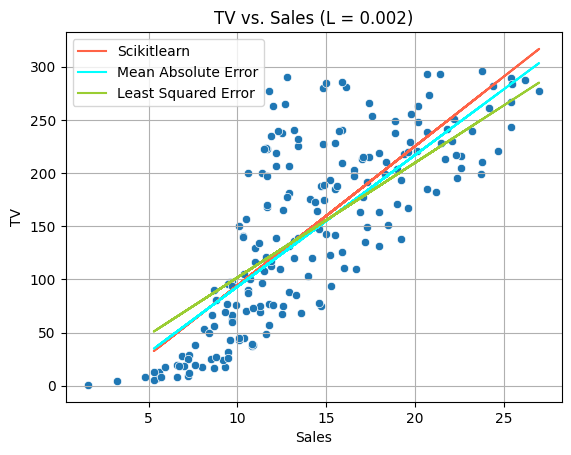

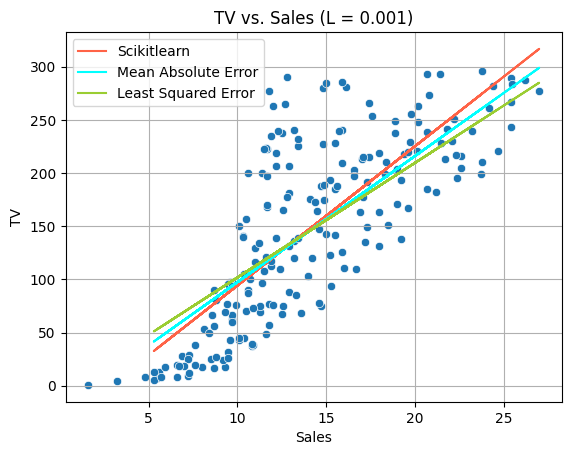

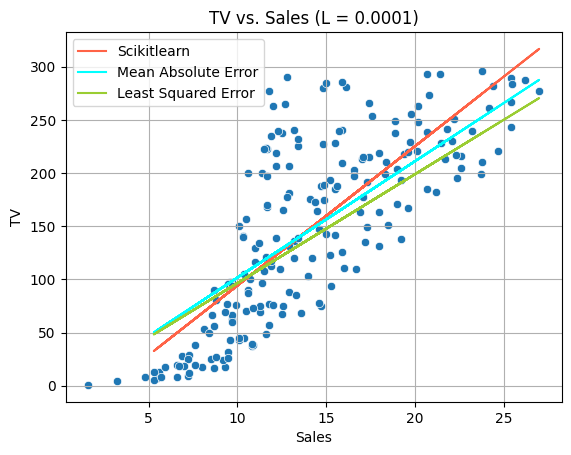

In [3]:
### Question 3 ###
# Import packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(sales_X_train, TV_Y_train)
# Make prediction using the testing set
TV_Y_pred = regr.predict(sales_X_test)
for i in range(len(L)):
    # Train Gradient Descent
    m_1, b_1, _ = gradDescent_1(sales_X_train, TV_Y_train, m0, b0, L[i])
    m_2, b_2, _ = gradDescent_2(sales_X_train, TV_Y_train, m0, b0, L[i])
    # Print RMSE
    print('=' * 100)
    print(f"(SKL, L = {L[i]})" + "Fit error (RMSE): %.2f" % np.sqrt(mean_squared_error(TV_Y_test, TV_Y_pred))) # Scikitlearn
    print(f"(MAE, L = {L[i]})" + "Fit error (RMSE): %.2f" % np.sqrt(mean_squared_error(TV_Y_test, m_1[0]*sales_X_test - b_1[0]))) # Mean Absolute Error
    print(f"(LSE, L = {L[i]})" + "Fit error (RMSE): %.2f" % np.sqrt(mean_squared_error(TV_Y_test, m_2[0]*sales_X_test - b_2[0]))) # Least Squared Error
    print('=' * 100 + '\n')
    # Plot data
    plt.figure()
    sns.scatterplot(data = df, x = 'sales', y = 'TV').set(title = f'TV vs. Sales (L = {L[i]})',
                                                            xlabel = 'Sales',
                                                            ylabel = 'TV')
    plt.plot(sales_X_test, TV_Y_pred, color = 'tomato', label = 'Scikitlearn')
    plt.plot(sales_X_test, m_1[0]*sales_X_test - b_1[0], color = 'cyan', label = 'Mean Absolute Error')
    plt.plot(sales_X_test, m_2[0]*sales_X_test - b_2[0], color = 'yellowgreen', label = 'Least Squared Error')
    # Plot config
    plt.grid()
    plt.legend()
plt.show()

# II Model selection
This problem will illustrate the use of cross validation to find optimal model parameters to aid in model selection. Download California housing data (https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html). This data contains eight predictor coefficients and one outcome (medianHouseValue). 
1. Explore the data.  Plot the distribution of median house value.   Plot median house value vs total bedrooms. Plot the correlation matrix.  Discuss plot results.
2. Explore three different linear regression models: these can include least squares, lasso, ridge, elastic net, or any other linear (or nonlinear) regression model.  Perform a grid search on the regularization parameters, and use five fold cross validation to find parameter values that minimize the error on your test data for each of the three models. For each model, plot a) regularization parameter value vs. error on test data and error on training data b) regularization parameter value vs predictor coefficient values.
3.  Plot test errors for all three models for the optimal parameters chosen in question 2.  Choose the model that best fits the data. Discuss the results.

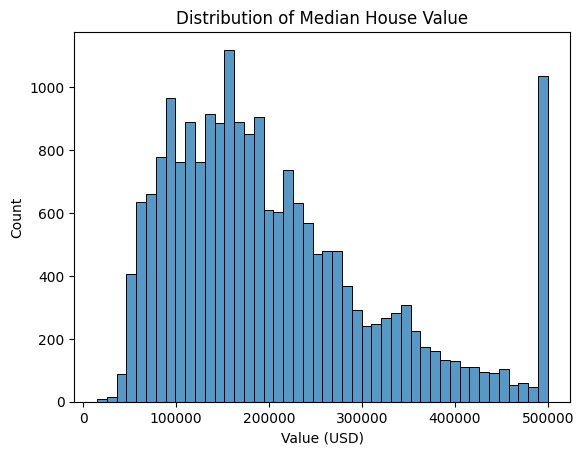

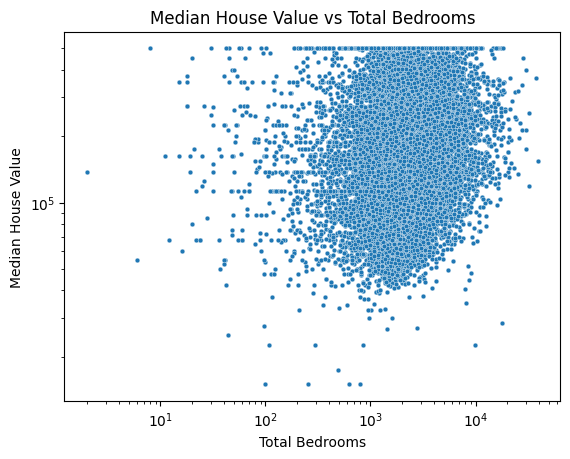

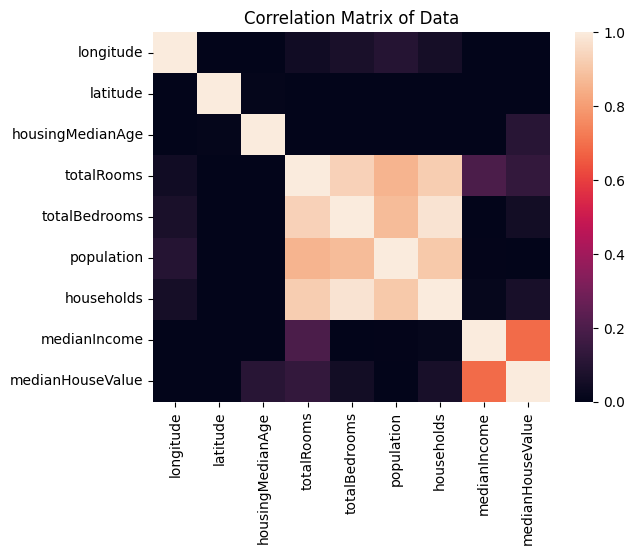

In [4]:
### Question 1 ###
# Load in data
data = pd.read_csv('cal_housing.data', header = None)
# Set column names
data.columns = ['longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome', 'medianHouseValue']
# Plot data 1
plt.figure()
sns.histplot(data = data, x = 'medianHouseValue').set(title = 'Distribution of Median House Value',
                                                      xlabel = 'Value (USD)')
# Plot data 2
plt.figure()
sns.scatterplot(data = data, x = 'totalRooms', y = 'medianHouseValue', s = 12).set(title = 'Median House Value vs Total Bedrooms',
                                                                                   xlabel = 'Total Bedrooms',
                                                                                   ylabel = 'Median House Value')
# Plot config 2
plt.yscale('log')
plt.xscale('log')
# Find correlation matrix
corr_matrix = data.corr()
# Plot data 3
plt.figure()
sns.heatmap(data = corr_matrix, vmin = 0, vmax = 1).set(title = 'Correlation Matrix of Data')
plt.show()

In [5]:
### Question 2 ###
# Import packages
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, KFold
import warnings
warnings.filterwarnings('ignore')
# Isolate data
X = data.loc[:,'totalRooms'].values.reshape(-1, 1)
Y = data.loc[:,'medianHouseValue'].values.reshape(-1, 1)
# Split the data into training/testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
# Define the parameter we wish to optimize
parameters = {'alpha':np.linspace(1e-12, 1e12)}
Lasso = linear_model.Lasso()
Ridge = linear_model.Ridge()
ElNet = linear_model.ElasticNet()
# Define the grid search that will use 5-fold cross validation
Lasso_reg = GridSearchCV(Lasso, parameters, scoring = 'neg_mean_squared_error',cv = 5)
Ridge_reg = GridSearchCV(Ridge, parameters, scoring = 'neg_mean_squared_error',cv = 5)
ElNet_reg = GridSearchCV(ElNet, parameters, scoring = 'neg_mean_squared_error',cv = 5)
# Fit the grid search
Lasso_reg.fit(X_train,Y_train)
Ridge_reg.fit(X_train,Y_train)
ElNet_reg.fit(X_train,Y_train)
# Best alpha parameter
print(Lasso_reg.best_estimator_)
print(Ridge_reg.best_estimator_)
print(ElNet_reg.best_estimator_)

Lasso(alpha=1e-12)
Ridge(alpha=1e-12)
ElasticNet(alpha=1e-12)


In [6]:
# Finding regularization parameter value vs. error on test data
alphas = np.linspace(1e-12, 1e12, 500)
mse_l = []
coef_l = []
mse_r = []
coef_r = []
mse_ElN = []
coef_ElN = []
for a in alphas:
    # LASSO
    l = linear_model.Lasso(alpha = a)
    l.fit(X_train, Y_train)
    Y_pred_l = l.predict(X_test)
    mean_l = mean_squared_error(Y_test, Y_pred_l)
    mse_l.append(mean_l)
    coef_l.append(l.coef_)
    # Ridge
    r = linear_model.Ridge(alpha = a)
    r.fit(X_train, Y_train)
    Y_pred_r = r.predict(X_test)
    mean_r = mean_squared_error(Y_test, Y_pred_r)
    mse_r.append(mean_r)
    coef_r.append(l.coef_)
    # Elastic Net
    ElN = linear_model.ElasticNet(alpha = a)
    ElN.fit(X_train, Y_train)
    Y_pred_ElN = ElN.predict(X_test)
    mean_ElN = mean_squared_error(Y_test, Y_pred_ElN)
    mse_ElN.append(mean_ElN)
    coef_ElN.append(l.coef_)

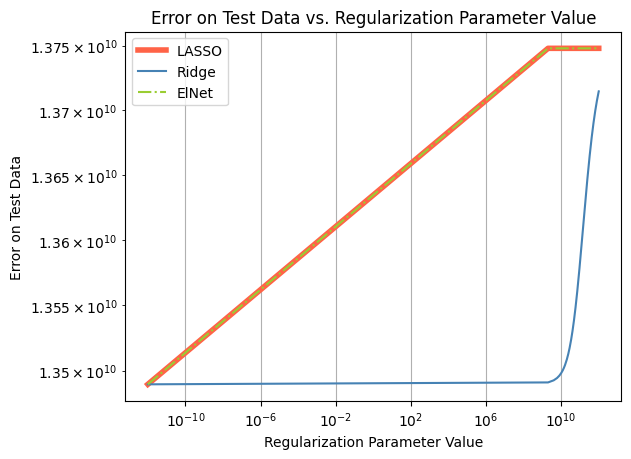

In [7]:
# Plotting regularization parameter value vs. error on test data
plt.figure()
plt.plot(alphas, mse_l, linewidth = 4, color = 'tomato', label = 'LASSO')
plt.plot(alphas, mse_r, color = 'steelblue', label = 'Ridge')
plt.plot(alphas, mse_ElN, ls = '-.', color = 'yellowgreen', label = 'ElNet')
# Plot config
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.title('Error on Test Data vs. Regularization Parameter Value')
plt.xlabel('Regularization Parameter Value')
plt.ylabel('Error on Test Data')
plt.legend()
plt.show()

In [8]:
# Finding regularization parameter value vs. error on training data
alphas = np.linspace(1e-12, 1e12, 500)
mse_l2 = []
mse_r2 = []
mse_ElN2 = []
for a in alphas:
    # LASSO
    l2 = linear_model.Lasso(alpha = a)
    l2.fit(X_train, Y_train)
    Y_pred_l2 = l2.predict(X_train)
    mean_l2 = mean_squared_error(Y_train, Y_pred_l2)
    mse_l2.append(mean_l2)
    # Ridge
    r2 = linear_model.Ridge(alpha = a)
    r2.fit(X_train, Y_train)
    Y_pred_r2 = r.predict(X_train)
    mean_r2 = mean_squared_error(Y_train, Y_pred_r2)
    mse_r2.append(mean_r2)
    # Elastic Net
    ElN2 = linear_model.ElasticNet(alpha = a)
    ElN2.fit(X_train, Y_train)
    Y_pred_ElN2 = ElN2.predict(X_train)
    mean_ElN2 = mean_squared_error(Y_train, Y_pred_ElN2)
    mse_ElN2.append(mean_ElN2)

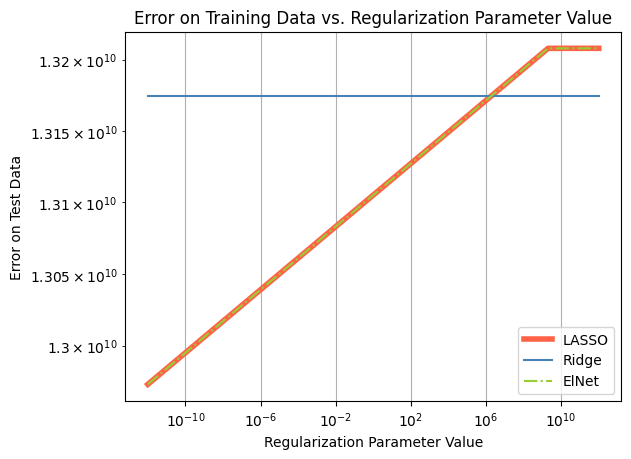

In [9]:
# Plotting regularization parameter value vs. error on training data
plt.figure()
plt.plot(alphas, mse_l2, linewidth = 4, color = 'tomato', label = 'LASSO')
plt.plot(alphas, mse_r2, color = 'steelblue', label = 'Ridge')
plt.plot(alphas, mse_ElN2, ls = '-.', color = 'yellowgreen', label = 'ElNet')
# Plot config
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.title('Error on Training Data vs. Regularization Parameter Value')
plt.xlabel('Regularization Parameter Value')
plt.ylabel('Error on Training Data')
plt.legend()
plt.show()

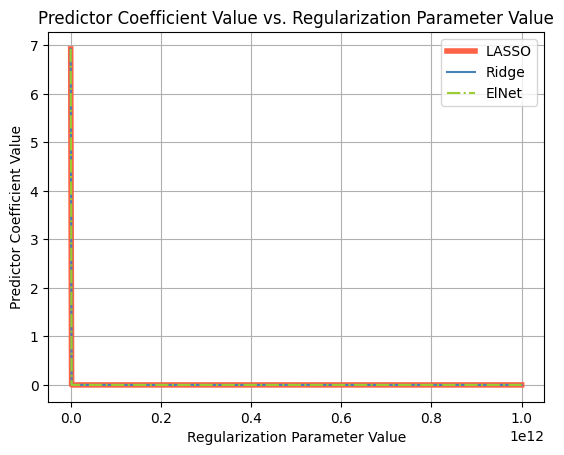

In [10]:
# Plotting regularization parameter value vs. predictor coefficient value
plt.figure()
plt.plot(alphas, coef_l, linewidth = 4, color = 'tomato', label = 'LASSO')
plt.plot(alphas, coef_r, color = 'steelblue', label = 'Ridge')
plt.plot(alphas, coef_ElN, ls = '-.', color = 'yellowgreen', label = 'ElNet')
# Plot config
plt.grid()
plt.title('Predictor Coefficient Value vs. Regularization Parameter Value')
plt.xlabel('Regularization Parameter Value')
plt.ylabel('Predictor Coefficient Value')
plt.legend()
plt.show()

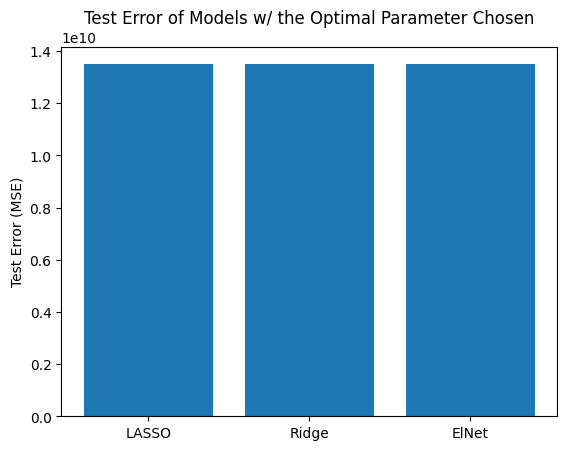

In [13]:
plt.bar(['LASSO', 'Ridge', 'ElNet'], [mse_l[0], mse_r[0], mse_ElN[0]])
plt.title('Test Error of Models w/ the Optimal Parameter Chosen')
plt.ylabel('Test Error (MSE)')
plt.show()